First we import all the necessary libraries and modules that we'll be needing

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xlrd

We have already downloaded the file as an .xls sheet so we simply need to read it

In [115]:
my_file_name = 'agri_data_file.xlsx'
data = pd.read_excel(my_file_name)

In [116]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30 00:00:00
2,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29 00:00:00
3,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28 00:00:00
4,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27 00:00:00


The data is not in the best shape, so we make the proper arrangements, first we solve the problem of unnamed columns and the extra added row 

In [117]:
col_names = data.iloc[0]
col_names

Unnamed: 0                       Sl no.
Unnamed: 1                District Name
Unnamed: 2                  Market Name
Unnamed: 3                    Commodity
Unnamed: 4                      Variety
Unnamed: 5                        Grade
Unnamed: 6      Min Price (Rs./Quintal)
Unnamed: 7      Max Price (Rs./Quintal)
Unnamed: 8    Modal Price (Rs./Quintal)
Unnamed: 9                   Price Date
Name: 0, dtype: object

In [118]:
data.columns = col_names

In [119]:
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30 00:00:00
2,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29 00:00:00
3,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28 00:00:00
4,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27 00:00:00


In [120]:
data = data.drop(0)
data

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30 00:00:00
2,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29 00:00:00
3,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28 00:00:00
4,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27 00:00:00
5,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...
1823,1823,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,2020-01-06 00:00:00
1824,1824,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,2020-01-05 00:00:00
1825,1825,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-01-04 00:00:00
1826,1826,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-01-02 00:00:00


Now the data looks better well organised and ready to use

The columns "Sl no.", "District Name", "Commodity" and "Grade" do not provide any new or useful information about the data so we drop these columns

In [121]:
data = data.drop(["Sl no.", "District Name", "Commodity", "Grade"], axis = 1)
data

,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1,Achnera,Desi,900,1000,950,2020-12-30 00:00:00
2,Achnera,Desi,800,900,850,2020-12-29 00:00:00
3,Achnera,Desi,850,950,900,2020-12-28 00:00:00
4,Achnera,Desi,800,900,850,2020-12-27 00:00:00
5,Achnera,Desi,800,900,850,2020-12-26 00:00:00
...,...,...,...,...,...,...
1823,Samsabad,Local,1000,1200,1100,2020-01-06 00:00:00
1824,Samsabad,Local,1000,1200,1100,2020-01-05 00:00:00
1825,Samsabad,Local,1100,1300,1200,2020-01-04 00:00:00
1826,Samsabad,Local,1100,1300,1200,2020-01-02 00:00:00


In [122]:
data['Price Date'] = pd.to_datetime(data['Price Date'])
# data = data.sort_values('Price Date')

Now we try plotting graphs for different types of attributes and features to get a better understanding of the data

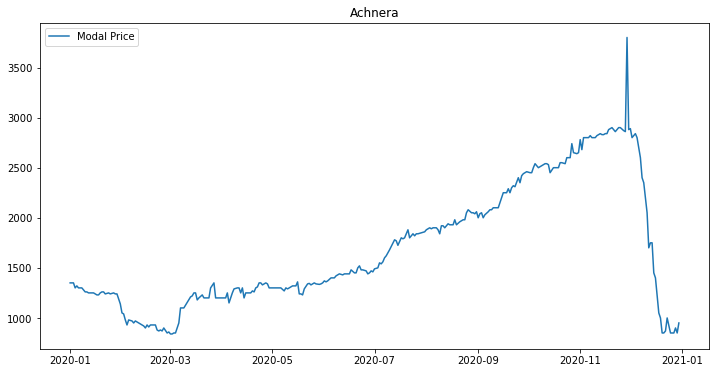

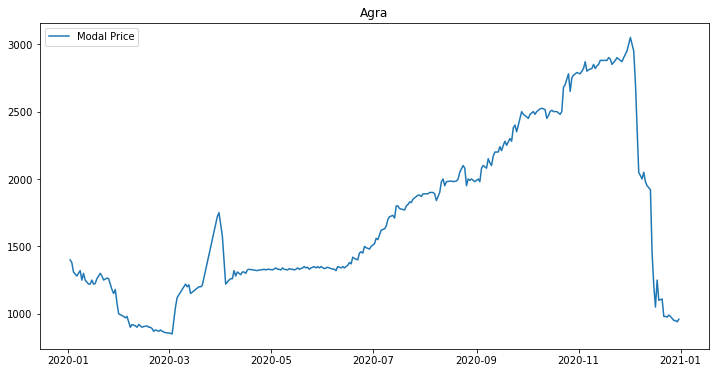

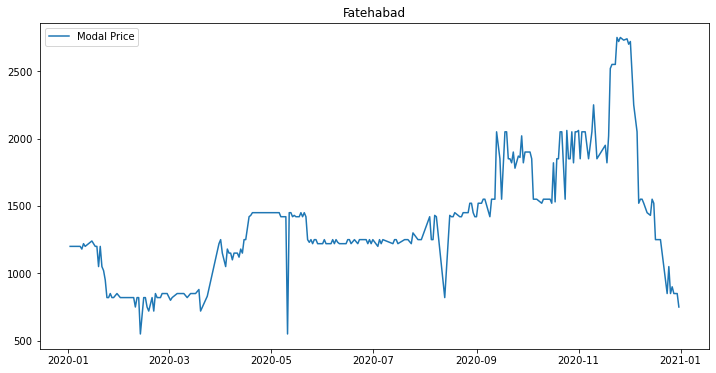

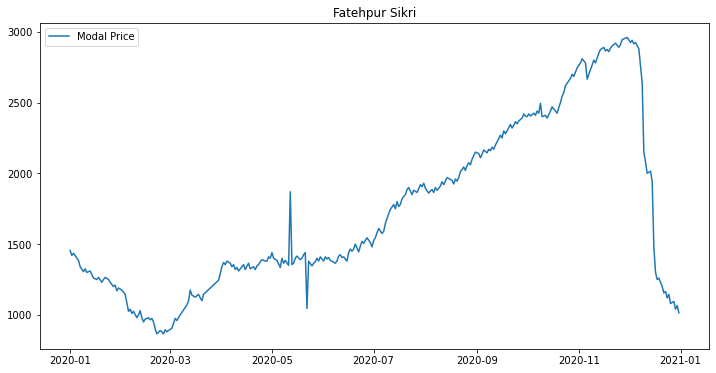

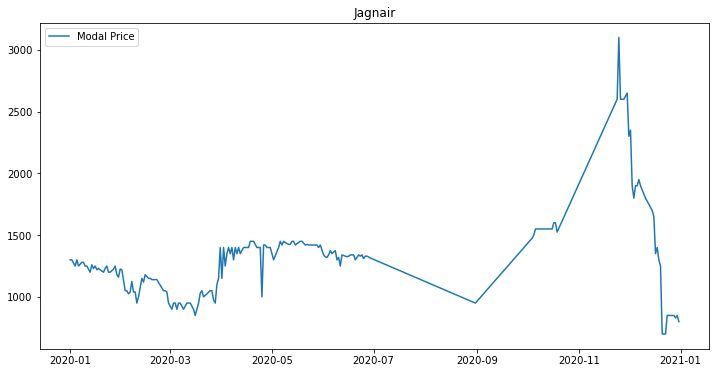

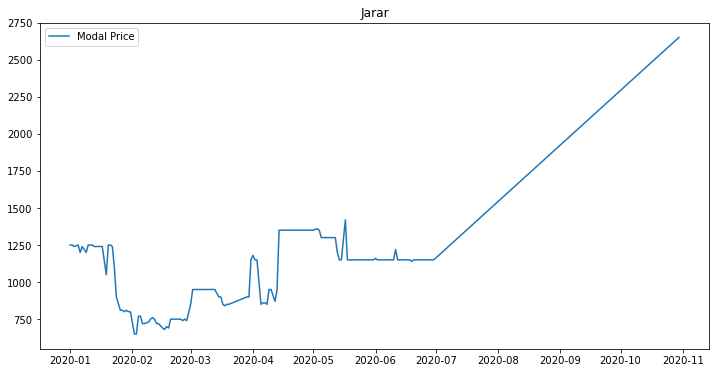

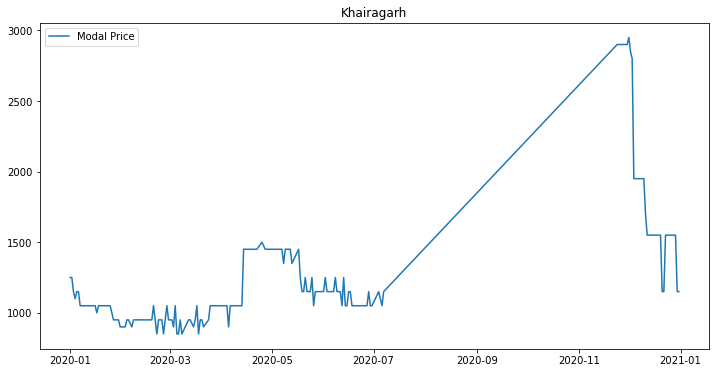

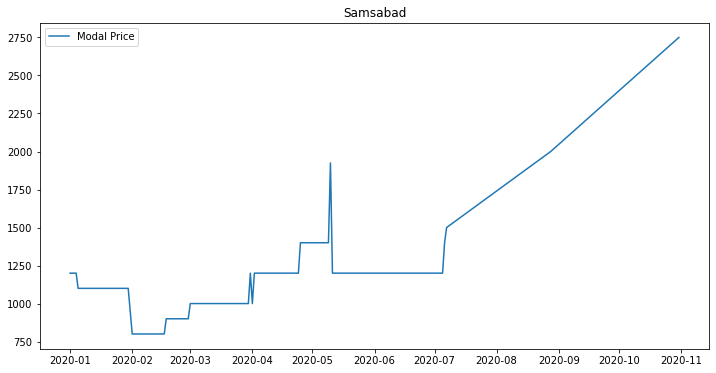

In [132]:
markets = data['Market Name'].unique()
for x in markets:
    market_data = data[data['Market Name'] == x]
    market_data.sort_values('Price Date')
    plt.plot(market_data["Price Date"], market_data['Modal Price (Rs./Quintal)'])
    plt.legend(['Modal Price'])
    plt.title(x)
#     print(numpy.shape(market_data))
    plt.show()

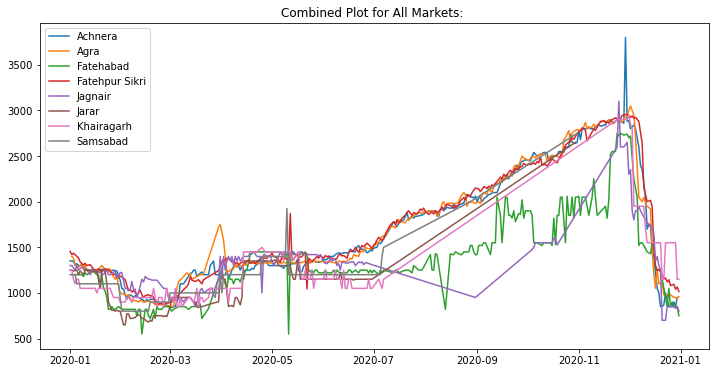

<Figure size 864x432 with 0 Axes>

In [133]:
for x in markets:
    market_data = data[data['Market Name'] == x]
    market_data.sort_values('Price Date')
    plt.plot(market_data["Price Date"], market_data['Modal Price (Rs./Quintal)'])
    plt.legend(markets)
    plt.title("Combined Plot for All Markets: ")
plt.show()

In [125]:
from matplotlib import rcParams

In [126]:
data.head()

,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1,Achnera,Desi,900,1000,950,2020-12-30
2,Achnera,Desi,800,900,850,2020-12-29
3,Achnera,Desi,850,950,900,2020-12-28
4,Achnera,Desi,800,900,850,2020-12-27
5,Achnera,Desi,800,900,850,2020-12-26


In [127]:
varieties = data.Variety.unique()
varieties

array(['Desi', 'Potato', 'Local', 'Other'], dtype=object)

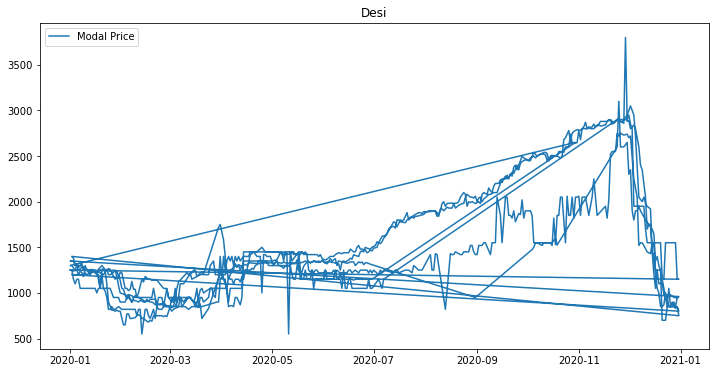

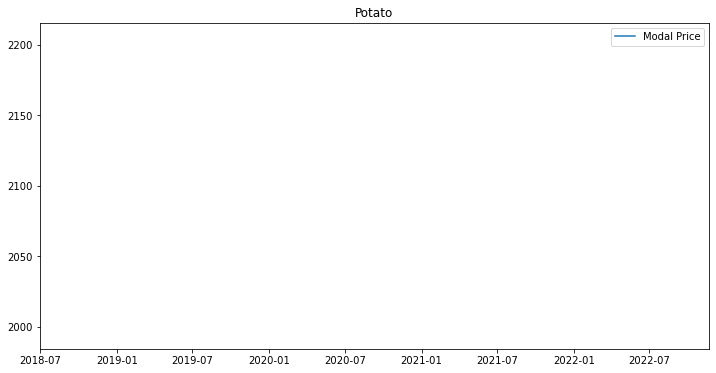

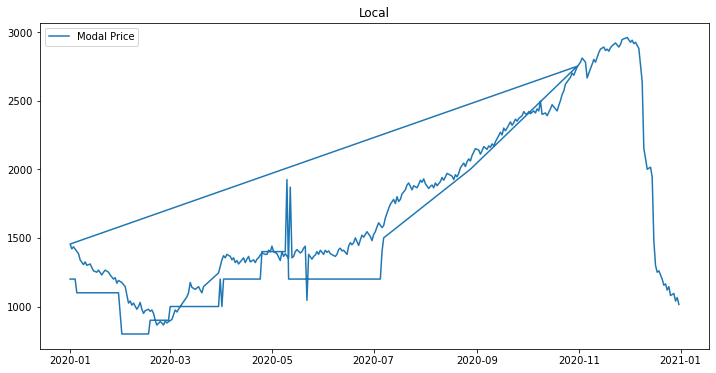

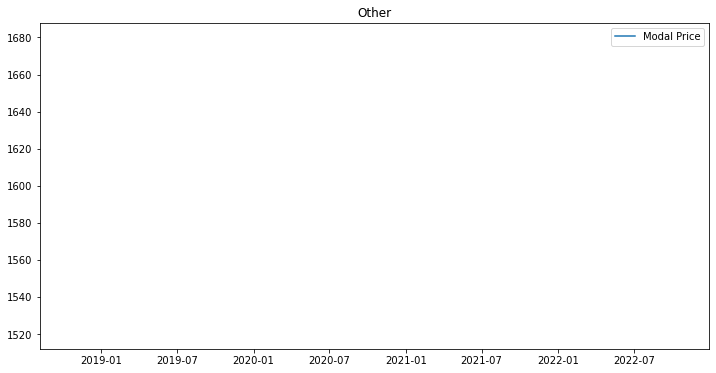

In [128]:
for x in varieties:
    variety_data = data[data['Variety'] == x]
    variety_data.sort_values('Price Date')
    plt.plot(variety_data["Price Date"], variety_data['Modal Price (Rs./Quintal)'])
    plt.legend(['Modal Price'])
    plt.title(x)
    plt.show()

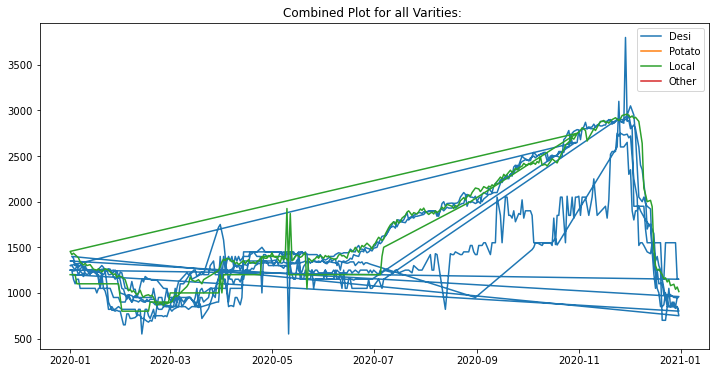

In [129]:
for x in varieties:
    variety_data = data[data['Variety'] == x]
    market_data.sort_values('Price Date')
    plt.plot(variety_data["Price Date"], variety_data['Modal Price (Rs./Quintal)'])
    plt.legend(varieties)
    plt.title("Combined Plot for all Varities: ")
plt.show()

In [130]:
data.sort_values(['Price Date', 'Market Name'])

,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
306,Achnera,Desi,1300,1400,1350,2020-01-01
1139,Fatehpur Sikri,Local,1400,1520,1455,2020-01-01
1326,Jagnair,Desi,1250,1350,1300,2020-01-01
1472,Jarar,Desi,1200,1300,1250,2020-01-01
1659,Khairagarh,Desi,1200,1300,1250,2020-01-01
...,...,...,...,...,...,...
307,Agra,Desi,800,1100,960,2020-12-31
592,Fatehabad,Desi,700,800,750,2020-12-31
850,Fatehpur Sikri,Local,900,1100,1015,2020-12-31
1140,Jagnair,Desi,750,850,800,2020-12-31


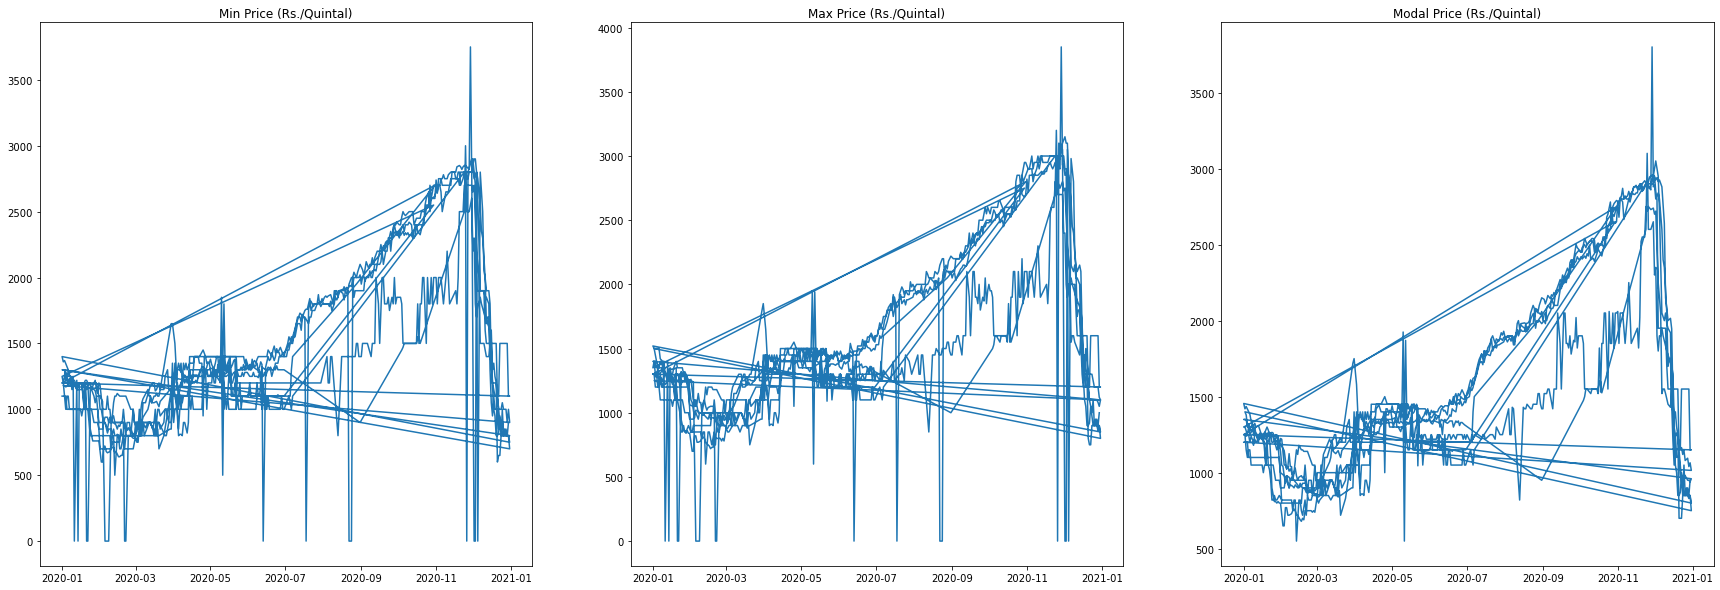

In [131]:
plt.figure(figsize = (30,10))
plt.subplot(1,3,1)
plt.title('Min Price (Rs./Quintal)')
plt.plot(data['Price Date'], data['Min Price (Rs./Quintal)'])
plt.subplot(1,3,2)
plt.title('Max Price (Rs./Quintal)')
plt.plot(data['Price Date'], data['Max Price (Rs./Quintal)'])
plt.subplot(1,3,3)
plt.title('Modal Price (Rs./Quintal)')
plt.plot(data['Price Date'], data['Modal Price (Rs./Quintal)'])